   Sample in Buffer Sample in Window   TRIGGER ILA_hist_data[20:0]  \
0  Radix - UNSIGNED         UNSIGNED  UNSIGNED            UNSIGNED   
1                 0                0         1               29529   
2                 1                1         0                2143   
3                 2                2         0                4885   
4                 3                3         0                2391   

  ILA_hist_sel[7:0] LED_OBUF  
0            BINARY      HEX  
1          00000000        1  
2          00000001        1  
3          00000010        1  
4          00000011        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sample in Buffer     513 non-null    object
 1   Sample in Window     513 non-null    object
 2   TRIGGER              513 non-null    object
 3   ILA_hist_data[20:0]  513 non-null    ob

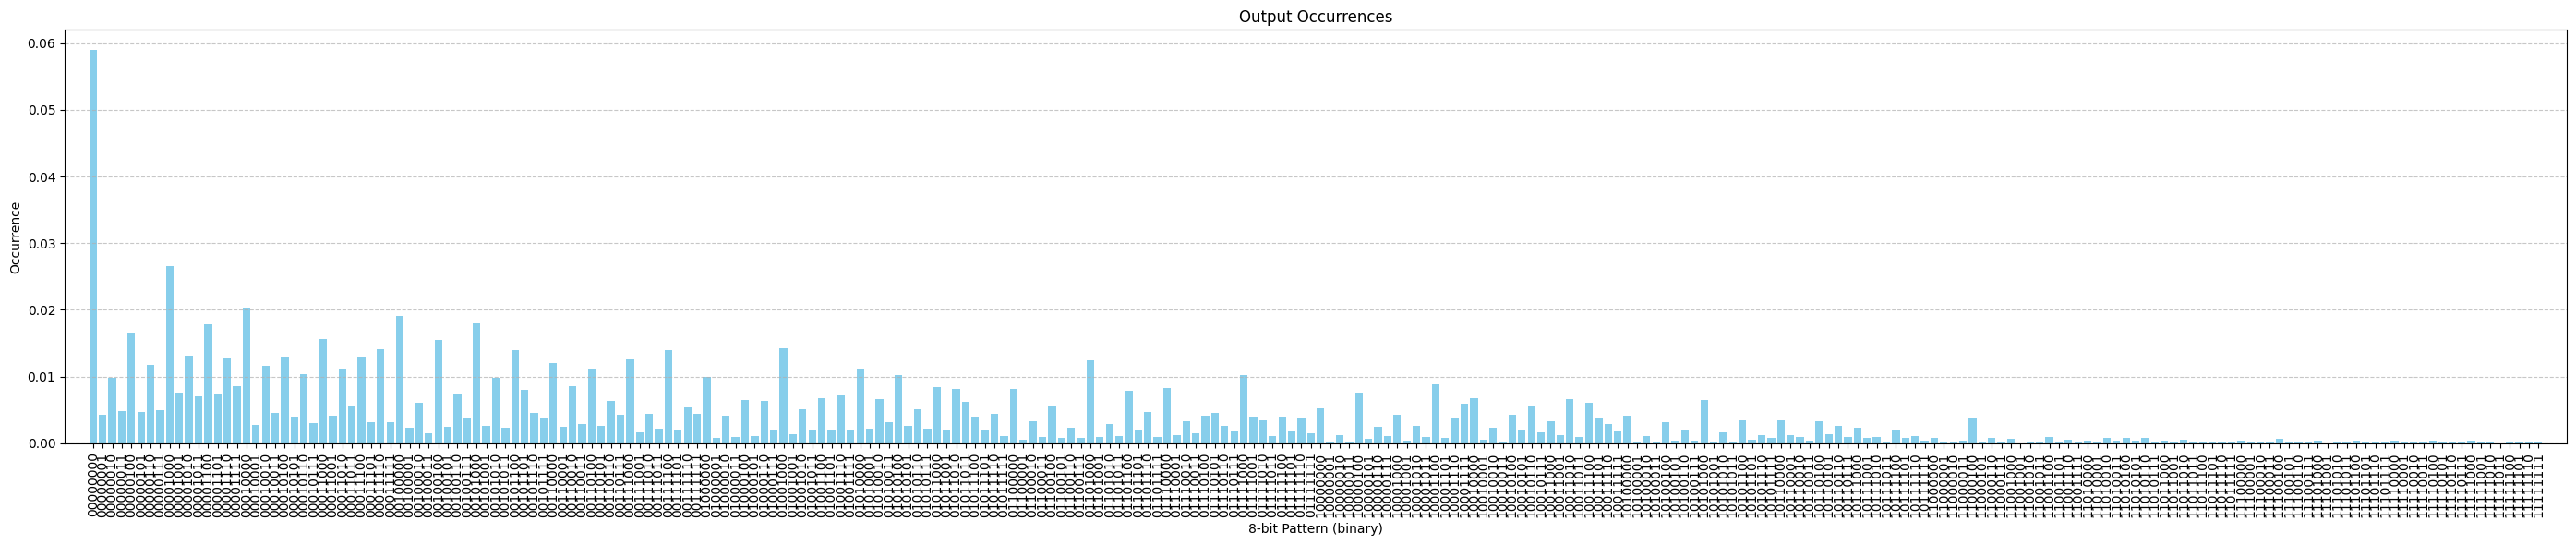

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Read the CSV file
df = pd.read_csv("iladata_500k_v4.csv", low_memory=False)
# print(df)
print(df.head())
print(df.info())

# Select rows 513 to 602 (inclusive) from the relevant columns
subset = df.loc[1:256, ["ILA_hist_data[20:0]", "ILA_hist_sel[7:0]"]].copy()
print(subset)
# # Convert string columns to numeric (int or float)
subset["ILA_hist_data[20:0]"] = pd.to_numeric(subset["ILA_hist_data[20:0]"], errors="coerce")
subset["ILA_hist_sel[7:0]"] = subset["ILA_hist_sel[7:0]"].astype(str)

# Drop rows with NaNs (if any conversion failed)
subset.dropna(inplace=True)
# print(subset.iloc[64])
# # Create a bar plot using the "Pattern" as the x-axis and "Occurrence" as the y-axis.
plt.figure(figsize=(28, 6))
plt.bar(subset["ILA_hist_sel[7:0]"], subset["ILA_hist_data[20:0]"]/subset["ILA_hist_data[20:0]"].sum(), color='skyblue')
plt.xlabel("8-bit Pattern (binary)")
plt.ylabel("Occurrence")
plt.title("Output Occurrences")
plt.margins(x=0.01)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# os.makedirs("Plots", exist_ok=True)
# plt.savefig(os.path.join("Plots", "TimeMUX_4x4=8"), dpi=300)
# plt.show()
print(subset["ILA_hist_data[20:0]"].sum())

   Sample in Buffer Sample in Window   TRIGGER ILA_hist_data[20:0]  \
0  Radix - UNSIGNED         UNSIGNED  UNSIGNED            UNSIGNED   
1                 0                0         1               23374   
2                 1                1         0                3356   
3                 2                2         0                7468   
4                 3                3         0                 188   

  ILA_hist_sel[7:0] LED_OBUF  
0            BINARY      HEX  
1          00000000        1  
2          00000001        1  
3          00000010        1  
4          00000011        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sample in Buffer     257 non-null    object
 1   Sample in Window     257 non-null    object
 2   TRIGGER              257 non-null    object
 3   ILA_hist_data[20:0]  257 non-null    ob

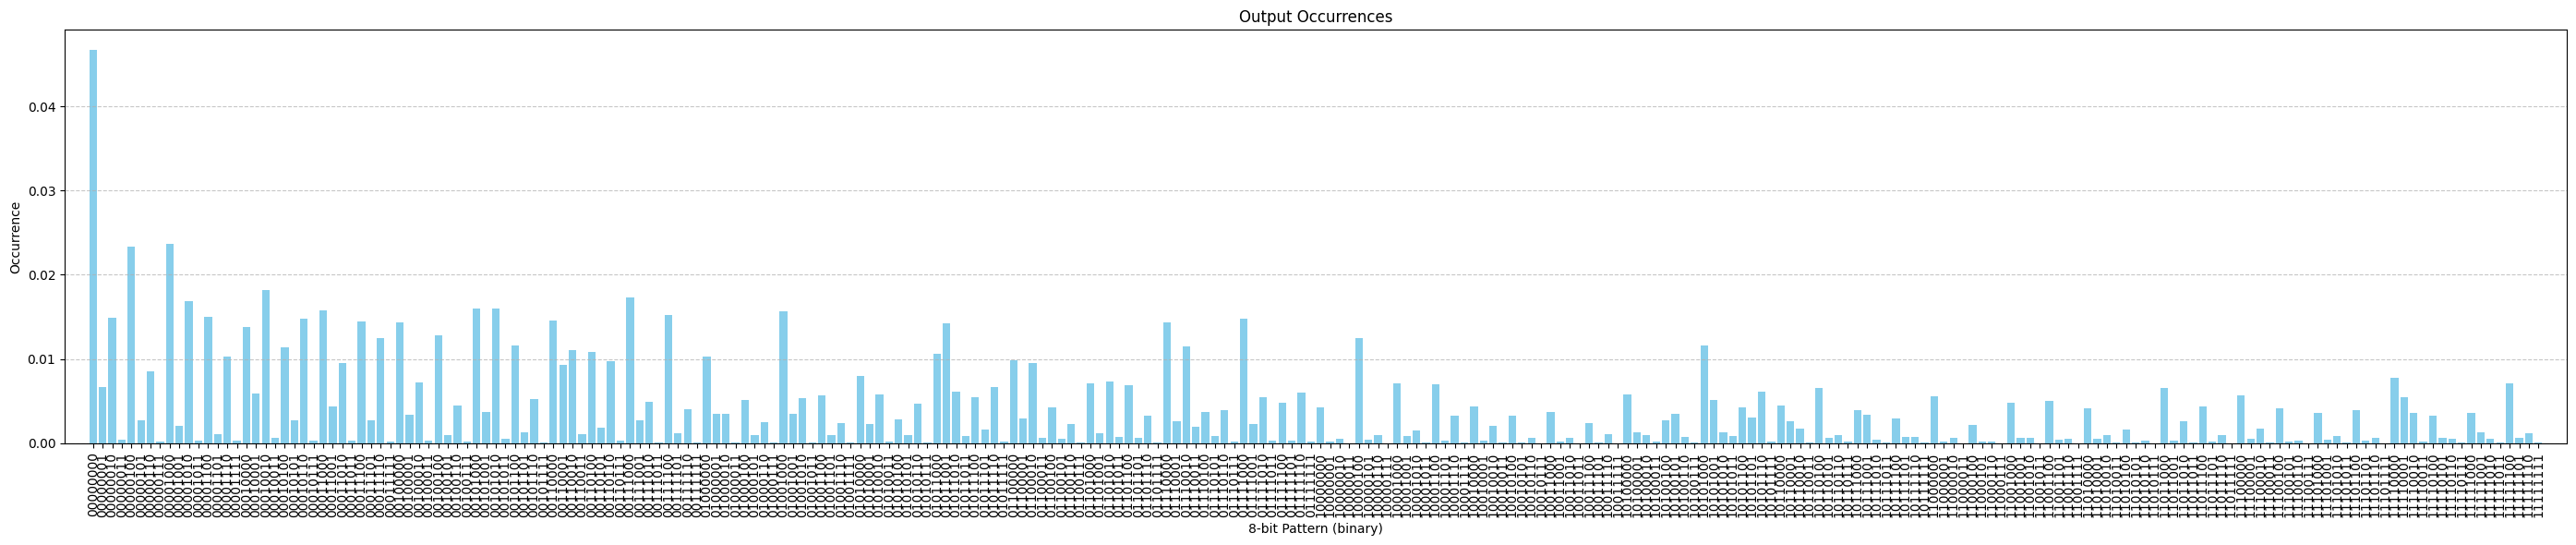

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Read the CSV file
df = pd.read_csv("ILA_DATA_FULL_IMP_500k.csv", low_memory=False)
# print(df)
print(df.head())
print(df.info())

# Select rows 513 to 602 (inclusive) from the relevant columns
subset = df.loc[1:256, ["ILA_hist_data[20:0]", "ILA_hist_sel[7:0]"]].copy()
print(subset)
# # Convert string columns to numeric (int or float)
subset["ILA_hist_data[20:0]"] = pd.to_numeric(subset["ILA_hist_data[20:0]"], errors="coerce")
subset["ILA_hist_sel[7:0]"] = subset["ILA_hist_sel[7:0]"].astype(str)

# Drop rows with NaNs (if any conversion failed)
subset.dropna(inplace=True)
# print(subset.iloc[64])
# # Create a bar plot using the "Pattern" as the x-axis and "Occurrence" as the y-axis.
plt.figure(figsize=(28, 6))
plt.bar(subset["ILA_hist_sel[7:0]"], subset["ILA_hist_data[20:0]"]/subset["ILA_hist_data[20:0]"].sum(), color='skyblue')
plt.xlabel("8-bit Pattern (binary)")
plt.ylabel("Occurrence")
plt.title("Output Occurrences")
plt.margins(x=0.01)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
# os.makedirs("Plots", exist_ok=True)
# plt.savefig(os.path.join("Plots", "TimeMUX_4x4=8"), dpi=300)
# plt.show()
print(subset["ILA_hist_data[20:0]"].sum())

        state count_full_imp
1    00000000          24344
2    00000001           1185
3    00000010           4400
4    00000011            226
5    00000100           7041
..        ...            ...
252  11111011             12
253  11111100           3661
254  11111101            543
255  11111110           1152
256  11111111             21

[256 rows x 2 columns]
        state count_time_mux
1    00000000          29529
2    00000001           2143
3    00000010           4885
4    00000011           2391
5    00000100           8295
..        ...            ...
252  11111011             11
253  11111100             53
254  11111101             22
255  11111110             50
256  11111111             21

[256 rows x 2 columns]
    count_time_mux_parallel     state
0                     22564  00000000
1                      3976  00000001
2                      4784  00000010
3                       630  00000011
4                      7381  00000100
..                      ... 

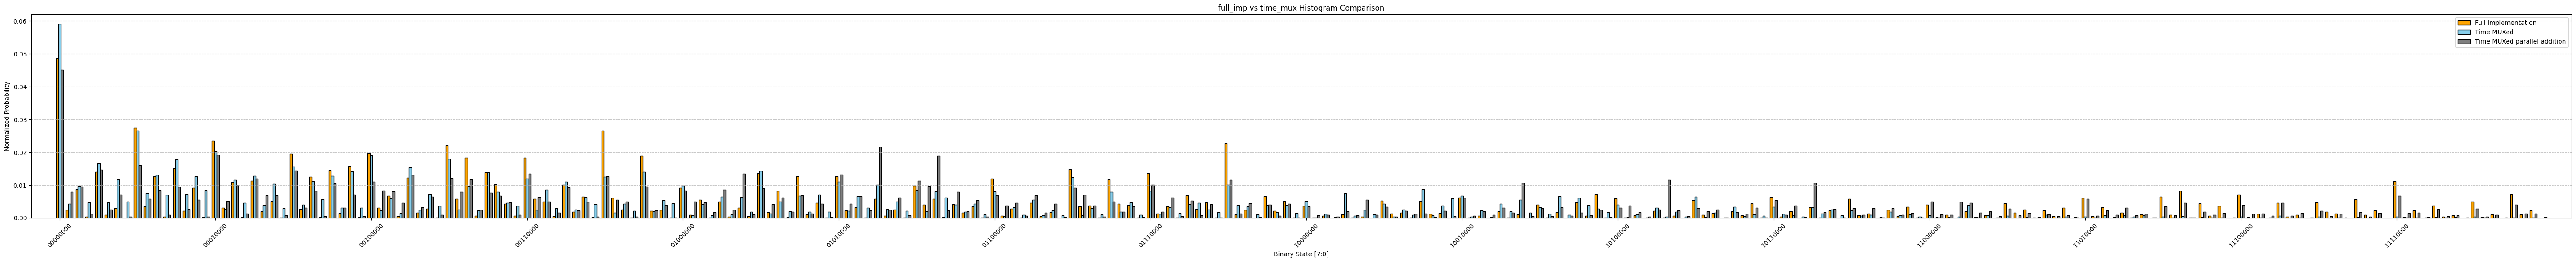

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load CSV files
file_full_imp = "ILA_DATA_FULL_IMP_500k_v2.csv"
file_time_mux = "iladata_500k_v4.csv"
file_time_mux_parallel = "8bit_mult_accelerator_parallel_500k.csv"

# Read files while preserving string formatting
data_full_imp= pd.read_csv(file_full_imp, low_memory=False, dtype=str)
data_time_mux = pd.read_csv(file_time_mux, low_memory=False, dtype=str)
data_time_mux_parallel = pd.read_csv(file_time_mux_parallel, low_memory=False, dtype=str)

# Standardize column names
data_full_imp.rename(columns=lambda x: x.strip().lower(), inplace=True)
data_time_mux.rename(columns=lambda x: x.strip().lower(), inplace=True)
data_time_mux_parallel.rename(columns=lambda x: x.strip().lower(), inplace=True)

# Extract relevant columns (skipping the first row with metadata)
full_imp_counts = data_full_imp[["ila_hist_sel[7:0]", "ila_hist_data[20:0]"]].iloc[1:257].copy()
time_mux_counts = data_time_mux[["ila_hist_sel[7:0]", "ila_hist_data[20:0]"]].iloc[1:257].copy()
time_mux_parallel_counts = data_time_mux_parallel[["ila_hist_sel[7:0]", "ila_hist_data[20:0]"]].iloc[0:257].copy()

# Rename columns for clarity
full_imp_counts.columns = ["state", "count_full_imp"]
time_mux_counts.columns = ["state", "count_time_mux"]
time_mux_parallel_counts.columns = ["count_time_mux_parallel", "state"]


# Convert time_mux_parallel state to 8-bit binary
time_mux_parallel_counts["state"] = time_mux_parallel_counts["state"].astype(int).apply(lambda x: format(x, '08b'))

print(full_imp_counts)
print(time_mux_counts)
print(time_mux_parallel_counts)

# Merge on binary state
merged = pd.merge(full_imp_counts, time_mux_counts, on="state", how="inner")
merged = pd.merge(merged, time_mux_parallel_counts, on="state", how="inner")


# Convert string counts to integers
merged["count_full_imp"] = merged["count_full_imp"].astype(int)
merged["count_time_mux"] = merged["count_time_mux"].astype(int)
merged["count_time_mux_parallel"] = merged["count_time_mux_parallel"].astype(int)

# Normalize to probability
merged["norm_full_imp"] = merged["count_full_imp"] / merged["count_full_imp"].sum()
merged["norm_time_mux"] = merged["count_time_mux"] / merged["count_time_mux"].sum()
merged["norm_time_mux_parallel"] = merged["count_time_mux_parallel"] / merged["count_time_mux_parallel"].sum()

# Sort by binary state
merged.sort_values(by="state", inplace=True)
print(merged)
# Plotting
x = np.arange(len(merged))
width = 0.25

plt.figure(figsize=(58, 6))
plt.bar(x - width, merged["norm_full_imp"], width=width, label="Full Implementation", color="orange", edgecolor='black')
plt.bar(x, merged["norm_time_mux"], width=width, label="Time MUXed", color="skyblue", edgecolor='black')
plt.bar(x + width, merged["norm_time_mux_parallel"], width=width, label="Time MUXed parallel addition", color="grey", edgecolor='black')
step = 16
plt.xticks(x[::step], merged["state"].iloc[::step], rotation=45)
plt.margins(x=0.01)
plt.xlabel("Binary State [7:0]")
plt.ylabel("Normalized Probability")
plt.title("full_imp vs time_mux Histogram Comparison")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [61]:
import numpy as np
import Scripts.CustomScripts as CS
def int_to_bits(n, width):
    """Convert integer n into a list of bits of given width (MSB first)."""
    return [(n >> i) & 1 for i in reversed(range(width))]

truth_table = []
# Iterate over all 4-bit numbers for A and B.
for A in range(16):
    for B in range(16):
        A_bits = int_to_bits(A, 4)  # 4 bits for A
        B_bits = int_to_bits(B, 4)  # 4 bits for B
        product = A * B
        # print(A,B,product)
        P_bits = int_to_bits(product, 8)  # 8 bits for the product
        truth_table.append(A_bits + B_bits + P_bits)

truth_table = np.array(truth_table)
print(len(truth_table))
columns = ["A3", "A2", "A1", "A0", "B3", "B2", "B1", "B0", "P7", "P6", "P5", "P4", "P3", "P2", "P1", "P0"]

output_columns = [ "P7", "P6", "P5", "P4", "P3", "P2", "P1", "P0"]
output_counts = CS.truth_table_probabilities(truth_table,columns,output_columns,figWidth=38)

counts_truth_table = output_counts[["Output State", "Probability"]].iloc[0:257].copy()
counts_truth_table.columns = ["state", "counts_truth_table"]
print(counts_truth_table)
merged = pd.merge(merged, counts_truth_table, on="state", how="inner")

256
        state  counts_truth_table
0    00000000            0.121094
1    00000001            0.003906
2    00000010            0.007812
3    00000011            0.007812
4    00000100            0.011719
..        ...                 ...
251  11111011            0.000000
252  11111100            0.000000
253  11111101            0.000000
254  11111110            0.000000
255  11111111            0.000000

[256 rows x 2 columns]


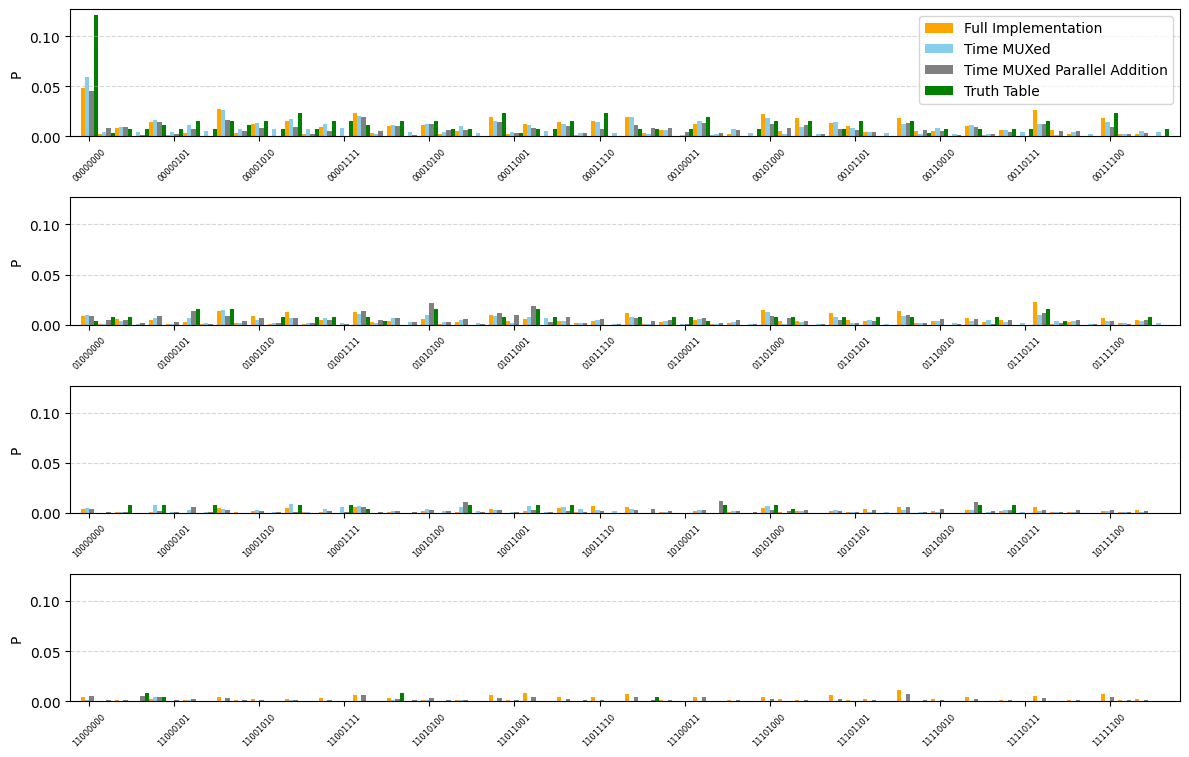

In [68]:
states_per_plot = 64
num_plots = len(merged) // states_per_plot

fig, axs = plt.subplots(num_plots, 1, figsize=(12, 8), sharey=True)

for i in range(num_plots):
    start = i * states_per_plot
    end = (i + 1) * states_per_plot
    subset = merged.iloc[start:end]
    x = np.arange(len(subset))

    axs[i].bar(x - 0.375, subset["norm_full_imp"], width=0.25, label="Full Implementation", color="orange")
    axs[i].bar(x - 0.125, subset["norm_time_mux"], width=0.25, label="Time MUXed", color="skyblue")
    axs[i].bar(x + 0.125, subset["norm_time_mux_parallel"], width=0.25, label="Time MUXed Parallel Addition", color="gray")
    axs[i].bar(x + 0.375, subset["counts_truth_table"], width=0.25, label="Truth Table", color="green")
    # axs[i].set_xticks(x)
    step = 5
    axs[i].set_xticks(x[::step])
    axs[i].set_xticklabels(subset["state"].iloc[::step], rotation=45, fontsize=6)
    axs[i].margins(x=0.01)
    axs[i].grid(axis='y', linestyle='--', alpha=0.5)
    axs[i].set_ylabel("P", fontsize=10)
    if i == 0:
        axs[i].legend(fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.96])
os.makedirs("Plots", exist_ok=True)
plt.savefig(os.path.join("Plots", "Comparison_500k"), dpi=300)
plt.show()